In [1]:
import os
import torch
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from pytorch_lightning import Trainer, seed_everything
os.chdir("/nfs/homedirs/schwienb/project-4")

In [2]:
from src.data.mnist import MNISTDataModule, ConstantDataset, RandomDataset
from src.data.fashionmnist import FashionMNISTDataModule
from src.models.pixelcnn import PixelCNN
from src.models.bg_aug_pixelcnn import BgAugPixelCNN
from src.experiments.experiment import Experiment
from src.utils.pixelcnn import generate_images
import torch.nn.functional as F

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
seed_everything(42)


42

In [4]:
early_stop_callback = EarlyStopping(
   monitor='val_loss',
   min_delta=0.0000,
   patience=3,
   verbose=True,
)
model_params = {
    'background_subtraction': True,
#     'background_subtraction_value': 1e-5,
#     'position_encode': True,
#     'in_channels': 3,
#     'foreground_addition_value': 1.0,
#     'bg_aug_max': 0.5,
#     'kernel_size': 3,
#     'padding': 1,
      'mse': True,
      'fg_mse': True
}
dataset_params = {
}
model = PixelCNN
dataset = FashionMNISTDataModule

# bgSub = .5
# bgSub00 = 0.0
# BG05 = bg_aug_max

EarlyStopping mode set to min for monitoring val_loss.


In [5]:
exp = Experiment('PixelCNN_BgSub_MSEFg_FashionMNIST_2', 
                 model=model, dataset=dataset, model_params=model_params, dataset_params=dataset_params, callbacks=[early_stop_callback])
exp.setup_new()


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


In [6]:
exp.train()

/nfs/students/winter-term-2020/project-4/schwienb/conda/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: Found unsupported keys in the lr scheduler dict: ['name']
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

  | Name   | Type       | Params
--------------------------------------
0 | blocks | Sequential | 1 M   


tensor(0.3827)
tensor(0.3788)


Traceback (most recent call last):
  File "/nfs/students/winter-term-2020/project-4/schwienb/conda/lib/python3.8/multiprocessing/queues.py", line 245, in _feed
    send_bytes(obj)
  File "/nfs/students/winter-term-2020/project-4/schwienb/conda/lib/python3.8/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/nfs/students/winter-term-2020/project-4/schwienb/conda/lib/python3.8/multiprocessing/connection.py", line 411, in _send_bytes
    self._send(header + buf)
  File "/nfs/students/winter-term-2020/project-4/schwienb/conda/lib/python3.8/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


tensor(0.1907)
tensor(0.1113)
tensor(0.1790)
tensor(0.0919)
tensor(0.0710)
tensor(0.0557)
tensor(0.0478)
tensor(0.0411)
tensor(0.0316)
tensor(0.0295)
tensor(0.0392)
tensor(0.0428)
tensor(0.0271)
tensor(0.0384)
tensor(0.0391)
tensor(0.0272)
tensor(0.0275)
tensor(0.0259)
tensor(0.0342)
tensor(0.0245)
tensor(0.0242)
tensor(0.0255)
tensor(0.0204)
tensor(0.0201)
tensor(0.0202)
tensor(0.0190)
tensor(0.0139)
tensor(0.0101)
tensor(0.0093)
tensor(0.0094)
tensor(0.0091)
tensor(0.0096)
tensor(0.0108)
tensor(0.0064)
tensor(0.0063)
tensor(0.0063)
tensor(0.0076)
tensor(0.0079)
tensor(0.0051)
tensor(0.0042)
tensor(0.0044)
tensor(0.0036)


/nfs/students/winter-term-2020/project-4/schwienb/conda/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  warnings.warn(*args, **kwargs)


Traceback (most recent call last):
  File "/nfs/students/winter-term-2020/project-4/schwienb/conda/lib/python3.8/multiprocessing/queues.py", line 245, in _feed
    send_bytes(obj)
  File "/nfs/students/winter-term-2020/project-4/schwienb/conda/lib/python3.8/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/nfs/students/winter-term-2020/project-4/schwienb/conda/lib/python3.8/multiprocessing/connection.py", line 411, in _send_bytes
    self._send(header + buf)
  File "/nfs/students/winter-term-2020/project-4/schwienb/conda/lib/python3.8/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/nfs/students/winter-term-2020/project-4/schwienb/conda/lib/python3.8/multiprocessing/queues.py", line 245, in _feed
    send_bytes(obj)
  File "/nfs/students/winter-term-2020/project-4/schwienb/conda/lib/python3.8/multiprocessing/

In [8]:
exp.save()

/nfs/homedirs/schwienb/project-4/src/utils/pixelcnn.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = F.softmax(out[:, :, i, j]).data


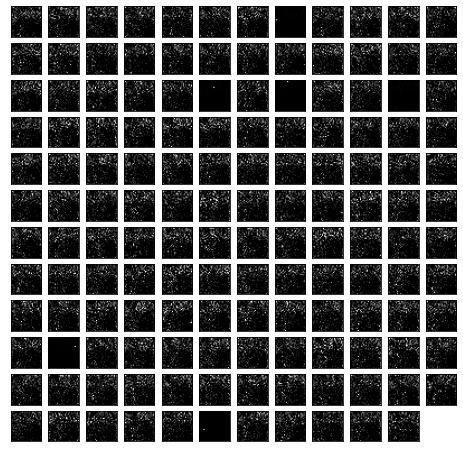

In [7]:
generate_images(exp.model, channels=1)